In [2]:
!pip install dmba   
# Comments: For pip installations in the notebook you need to add '!' before the command
# Other general comments
# It would help to have a requirements.txt file where all dependencies are installed in an environment 


  Obtaining dependency information for dmba from https://files.pythonhosted.org/packages/e5/ec/b58a6ea1bd4cd6ceb7d74718655a1beb777eefebcbf52d89cbab4fd9eb66/dmba-0.2.4-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ------------------------ ------------- 30.7/47.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 471.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.8 MB 660.6 kB/s eta 0:00:18
   ---------------------------------------- 0.0/11.8 MB 495.5 kB/s eta 0:00:24
   ---------------------------------------- 0.1/11.8 MB 544.7 kB/s eta 0:00:22
   ---------------------------------------- 0.1/11.8 MB 491.5 kB/s eta 0:00:24
   ---------------------------------------- 0.1/11.8 MB 491.5 kB/s eta 0:00:24
   ---------------------------------------- 0.1/11.8 MB 491.5 kB/s eta 0:00:24
   ----------------------------

In [3]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, recall_score, precision_score, f1_score, roc_auc_score 
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pylab as plt
import numpy as np 
import seaborn as sns

In [4]:
df = pd.read_csv('./drug_consumption.data.csv')
df
# Comment  - it would also be good to provide a link to the data if the data can not be pushed to repository. I can not run or test your code without the data

FileNotFoundError: [Errno 2] No such file or directory: './drug_consumption.data.csv'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Country       1601 non-null   int64
 1   ID            1601 non-null   int64
 2   Age           1601 non-null   int64
 3   Gender        1601 non-null   int64
 4   Alcohol       1601 non-null   int64
 5   Amphetamine   1601 non-null   int64
 6   Amyl Nitrite  1601 non-null   int64
 7   Benzos        1601 non-null   int64
 8   Caffeine      1601 non-null   int64
 9   Cannabis      1601 non-null   int64
 10  Chocolate     1601 non-null   int64
 11  Cocaine       1601 non-null   int64
 12  Crack         1601 non-null   int64
 13  Ecstasy       1601 non-null   int64
 14  Heroin        1601 non-null   int64
 15  Ketamine      1601 non-null   int64
 16  Legal Highs   1601 non-null   int64
 17  LSD           1601 non-null   int64
 18  Methadone     1601 non-null   int64
 19  Mushrooms     1601 non-null

In [5]:
y = df['Country']
X = df.drop(columns=['Country'])

In [6]:
X = pd.get_dummies(X, drop_first= True)
y = pd.get_dummies(y, drop_first= True)

In [7]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
print (train_X, train_y)
print (valid_X, valid_y)

        ID  Age  Gender  Alcohol  Amphetamine  Amyl Nitrite  Benzos  Caffeine  \
776    905   21       1        0            1             0       0         1   
616    695   40       1        1            0             0       0         1   
370    419   29       1        1            0             0       0         1   
1116  1340   21       1        1            0             0       0         1   
1123  1350   21       0        1            0             0       0         1   
...    ...  ...     ...      ...          ...           ...     ...       ...   
715    823   21       1        1            0             0       0         1   
905   1074   21       0        0            0             0       0         1   
1096  1313   40       0        1            0             0       0         1   
235    271   50       0        1            0             0       0         1   
1061  1270   29       0        1            0             0       0         1   

      Cannabis  Chocolate  

In [8]:
def perf_measure (y_true, y_pred):
    
    all_per_list  = []
    
    all_per_list.append (accuracy_score (y_true, y_pred))
    all_per_list.append (recall_score (y_true, y_pred))
    all_per_list.append (precision_score (y_true, y_pred))
    all_per_list.append (f1_score (y_true, y_pred))
    all_per_list.append (roc_auc_score (y_true, y_pred))
    
    return all_per_list

In [9]:
models = {
    
    "RF": RandomForestClassifier (),
    "DT": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "adab": AdaBoostClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)  
    
}

In [10]:
Perf_per_algorithm = {} 

y_pred = {}
cm = {} 

for k, v in models.items ():
    
    clf = v
    clf.fit (train_X, train_y)
    y_pred [k] = clf.predict (valid_X)
    Perf_per_algorithm [k] = perf_measure (valid_y,  y_pred [k]) 
    cm [k] = confusion_matrix (valid_y,
                           y_pred [k], normalize ="true")

/var/folders/2s/pzdkq7nd3gg89m2zsd0gqftm0000gn/T/ipykernel_39294/2164267379.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit (train_X, train_y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
cm

{'RF': array([[0.91252955, 0.08747045],
        [0.2293578 , 0.7706422 ]]),
 'DT': array([[0.90070922, 0.09929078],
        [0.34862385, 0.65137615]]),
 'KNN': array([[0.89834515, 0.10165485],
        [0.2706422 , 0.7293578 ]]),
 'adab': array([[0.90070922, 0.09929078],
        [0.3440367 , 0.6559633 ]])}

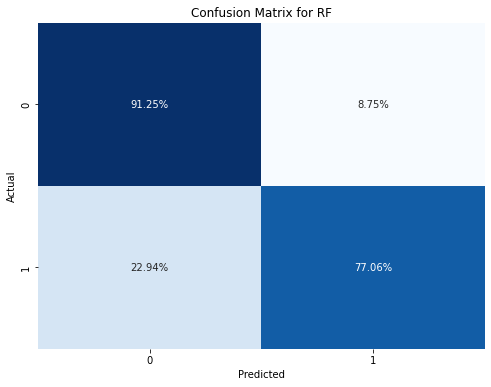

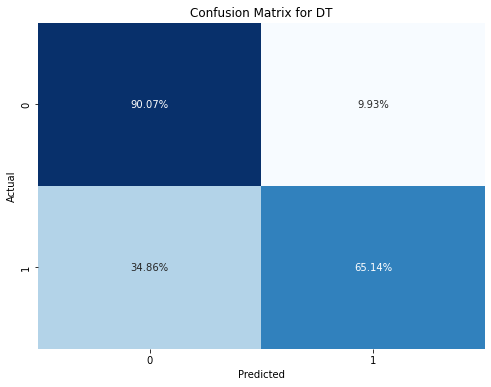

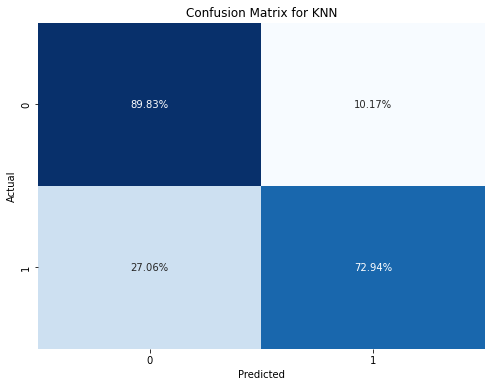

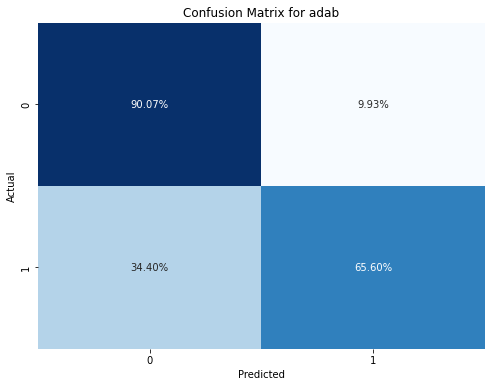

In [12]:
for model_name, matrix in cm.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, 
                    fmt='.2%',
                    cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [13]:
Perf_per_algorithm

{'RF': [0.8642745709828393,
  0.7706422018348624,
  0.8195121951219512,
  0.7943262411347518,
  0.8415858763311428],
 'DT': [0.8159126365054602,
  0.6513761467889908,
  0.7717391304347826,
  0.7064676616915423,
  0.7760426833235733],
 'KNN': [0.8408736349453978,
  0.7293577981651376,
  0.7871287128712872,
  0.7571428571428572,
  0.8138514759147201],
 'adab': [0.8174726989079563,
  0.6559633027522935,
  0.772972972972973,
  0.7096774193548387,
  0.7783362613052248]}

In [14]:
pd.DataFrame.from_dict(Perf_per_algorithm, orient='index', 
                       columns=['Accuracy', 'Recall', 'Precision', 'F1', 'AUC'])

,Accuracy,Recall,Precision,F1,AUC
RF,0.864275,0.770642,0.819512,0.794326,0.841586
DT,0.815913,0.651376,0.771739,0.706468,0.776043
KNN,0.840874,0.729358,0.787129,0.757143,0.813851
adab,0.817473,0.655963,0.772973,0.709677,0.778336


When comparing the performance scores of each algorithm, it is obvious that the Random Forest algorithm is best suited for this data model. This is evident because the Random Forest algorithm performed the best in each performance measure, with an Accuracy score of <b>0.87</b>, Precision score of <b>0.82</b>, and an AUC score of <b>0.84</b>.

In [15]:
# end of Final Project - JaMor Hairston